In [546]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import math

In [547]:
def getBoards(df):
    currentBoard = []
    boards = []
    for values in df.values:
        currentBoard = []
        for index, char in enumerate(values):
#             print(currentBoard)
            if str(char)[0] == '[':
                currentBoard.append(int(char[1]))
            elif str(char)[-1] == ']':
                currentBoard.append(int(char[-2]))
            elif len(currentBoard) == 81:
                boards.append(currentBoard)
                break
            else:
                currentBoard.append(int(char)) 
                        
    return boards
df = pd.read_csv("SamePackingDataCorrect/1.csv")
boards = getBoards(df)

In [548]:
def getDfs():
    dfs = []
    path = "SamePackingDataCorrect"
    for sudoku in os.listdir(path):
        df = pd.read_csv(path+ "/"+sudoku,names=(np.append(np.arange(81), ['random', 'time', 'diff', 'int'])) )
        boards = getBoards(df)
        df['challenge'] = boards
        df['random'] = df['random'] == ' random'
        dfs.append(df.iloc[:,81:])
    return dfs

def getAllDfs():
    dfs = getDfs()
    heuristic = []
    random = []
    for df in dfs:
        heur = df[df['random'] == False]
        heur = heur.iloc[:,1:]
        ran = df[df['random'] == True]
        ran = ran.iloc[:,1:]
        heuristic.append(heur)
        random.append(ran)
    return dfs, heuristic, random

In [549]:
dfs, heur, rnd = getAllDfs()

C:\Users\alexa\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log


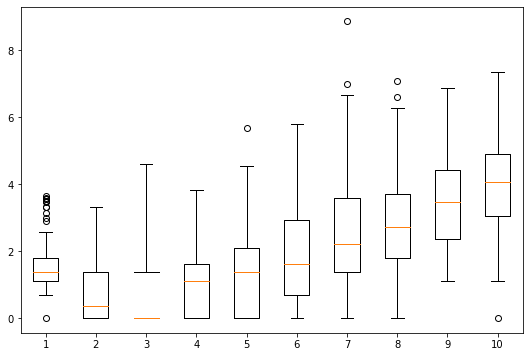

In [568]:
def getColumnsSeperatedByRuns(dfs, column='time'):
    times = [[],[],[],[],[],[],[],[],[],[]]
    for df in dfs:
        for i, time in enumerate(df[column]):
            if not math.isnan(float(time)):
                times[i].append(float(time))
            else:
                times[i].append(np.mean(times[i]))
    return times

def getMaxColumn(dfs, column='time'):
    res = []
    for df in dfs:
        res.append(df[column].iloc[-1])
        
    return res

fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot([np.log(r) for r in getColumnsSeperatedByRuns(rnd)])


In [559]:
rnd[0]['time'] - rnd[0]['time'].shift(1)

0    NaN
1    5.0
2    3.0
3    5.0
4    6.0
5    3.0
6    4.0
7    6.0
8    5.0
9    6.0
Name: time, dtype: float64

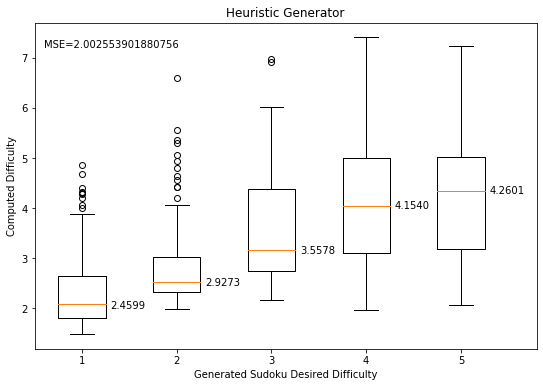

In [623]:
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
heuristicDifficulties = [r for i, r in enumerate(getColumnsSeperatedByRuns(heur,'diff')) if i < 5]
bp = ax.boxplot(heuristicDifficulties)

summation = 0
length = 0
for i, heuristicDiff in enumerate(heuristicDifficulties):
    length += len(heuristicDiff)
    for value in heuristicDiff:
        difference = i - value + 1
        summation += difference ** 2
        
MSE = summation / length


plt.xlabel('Generated Sudoku Desired Difficulty')
plt.ylabel('Computed Difficulty')
plt.title('Heuristic Generator')
plt.text(1.3,2,str(np.mean(heuristicDifficulties[0]))[:6])
plt.text(2.3,2.45,str(np.mean(heuristicDifficulties[1]))[:6])
plt.text(3.3,3.1,str(np.mean(heuristicDifficulties[2]))[:6])
plt.text(4.3,4.,str(np.mean(heuristicDifficulties[3]))[:6])
plt.text(5.3,4.3,str(np.mean(heuristicDifficulties[4]))[:6])
plt.text(0.6,7.2, "MSE="+str(MSE))
plt.xlim(0.5,5.8)


plt.savefig('HeuristicAchievedDifficulties.png')

# plt.savefig('HeuristicDdesLogTime.png')

In [614]:
print(MSE)

2.002553901880756


Text(0.5, 1.0, 'Random Generator')

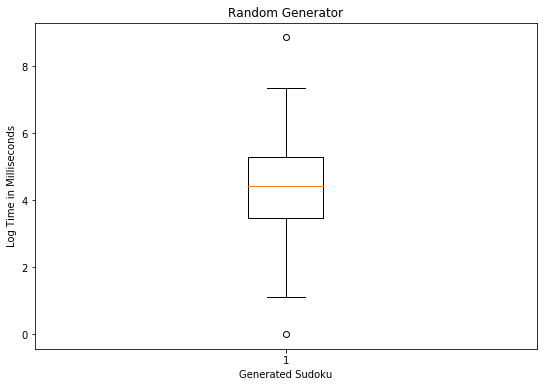

In [573]:
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
# logs = [np.log(r) for r in getColumnsSeperatedByRuns(rnd, column='time')]
# for i in range(1,len(logs)):
#     print(i)
#     logs[i] = logs[i] - logs[i-1

bp = ax.boxplot([np.log(r) for r in getMaxColumn(rnd,'time')])

plt.xlabel('Generated Sudoku')
plt.ylabel('Log Time in Milliseconds')
plt.title("Random Generator")

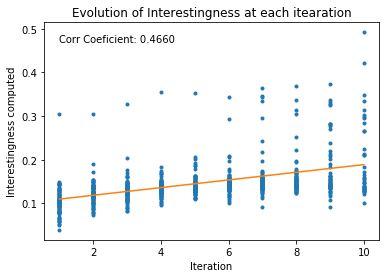

In [642]:
interesting, iteration = flattening(rnd, 'int')
plt.plot(iteration, interesting,'.')

b, m = np.polynomial.polynomial.polyfit(iteration, interesting, 1)
corr = np.corrcoef(iteration,interesting)
plt.text(1,0.47, "Corr Coeficient: " + str(corr[0][1])[:6])
plt.plot(iteration, b + m * np.array(iteration),'-')

plt.title('Evolution of Interestingness at each itearation')
plt.xlabel('Iteration')
plt.ylabel('Interestingness computed')

plt.savefig('RndIntEvolution.png')

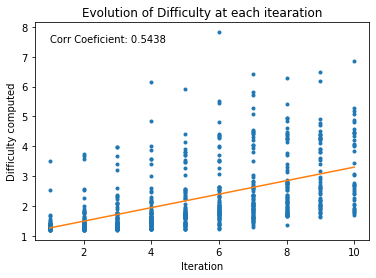

In [643]:
difficulty, iteration = flattening(rnd, 'diff')
plt.plot(iteration, difficulty,'.')

b, m = np.polynomial.polynomial.polyfit(iteration, difficulty, 1)
corr = np.corrcoef(iteration,difficulty)
plt.text(1,7.5, "Corr Coeficient: " + str(corr[0][1])[:6])
plt.plot(iteration, b + m * np.array(iteration),'-')

plt.title('Evolution of Difficulty at each itearation')
plt.xlabel('Iteration')
plt.ylabel('Difficulty computed')

plt.savefig('RndDiffEvolution.png')

In [451]:
def flattening(dfs, column):
    cols = getColumnsSeperatedByRuns(dfs, column=column)
    x = []
    y = []
    for i,c in enumerate(cols):
        for el in c:
            x.append(el)
            y.append(i+1)
   
    return x,y

# plt.plot(getColumnsSeperatedByRuns(rnd, column='diff')[0],getColumnsSeperatedByRuns(rnd, column='int'))

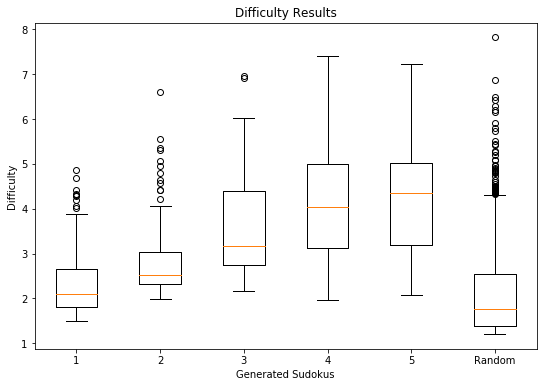

In [669]:
times = [r for i, r in enumerate(getColumnsSeperatedByRuns(heur,'diff')) if i < 5]
times.append(flattening(rnd,'diff')[0])

fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

bp = ax.boxplot(times)

plt.xlabel('Generated Sudokus')
plt.ylabel('Difficulty')
plt.xticks(np.arange(7),['0','1','2','3','4','5','Random'])
plt.title('Difficulty Results')
plt.xlim(0.5,6.5)
plt.savefig('difficultyComparison.png')

In [ ]:
x_int,y_int = flattening(rnd, 'int')
x_diff,y_diff = flattening(rnd, 'diff')
corr = np.corrcoef(x_diff,x_int)
print(corr)
plt.text(1.5,0.7, "Corr Coeficient: " + str(corr[0][1]))

b, m = np.polynomial.polynomial.polyfit(x_diff, x_int, 1)

plt.plot(x_diff,x_int,'.')
plt.plot(x_diff, b + m * np.array(x_diff),'-')
plt.text(1,0.47, "Corr Coeficient: " + str(corr[0][1]))

plt.xlabel('Difficulty')
plt.ylabel('Interestingness')
plt.title('Random Generator')

plt.savefig('RandomGeneratorDI.png')

[[ 1.         -0.04872001]
 [-0.04872001  1.        ]]


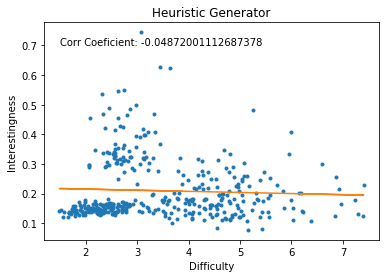

In [507]:
x_int,y_int = flattening(heur, 'int')
x_diff,y_diff = flattening(heur, 'diff')

b, m = np.polynomial.polynomial.polyfit(x_diff, x_int, 1)

plt.plot(x_diff,x_int,'.')
plt.plot(x_diff, b + m * np.array(x_diff),'-')
corr = np.corrcoef(x_diff,x_int)
print(corr)
plt.text(1.5,0.7, "Corr Coeficient: " + str(corr[0][1]))

plt.xlabel('Difficulty')
plt.ylabel('Interestingness')
plt.title('Heuristic Generator')
plt.savefig('HeuristicGeneratorDI.png')

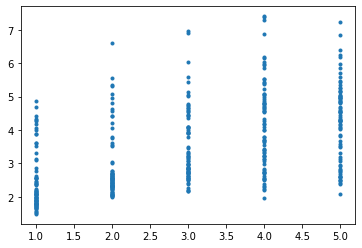

In [482]:
plt.plot(y_diff, x_diff, '.')

Text(0.5, 1.0, 'Heuristic Generator - difficulty/time comparison')

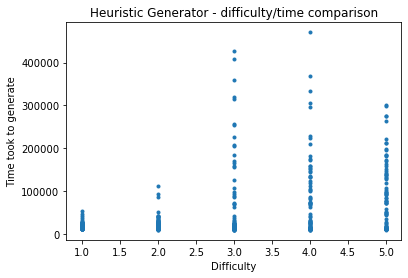

In [479]:
x_time,y_int = flattening(heur, 'time')
plt.plot(y_int,x_time,'.')
plt.xlabel('Difficulty')
plt.ylabel('Time took to generate')
plt.title('Heuristic Generator - difficulty/time comparison')

,time,diff,int,challenge
10,52970,3.869587,0.231331,"[0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 3, 0, ..."
11,110647,1.995961,0.177652,"[1, 8, 0, 0, 6, 0, 2, 0, 9, 0, 0, 0, 0, 3, 7, ..."
12,26301,2.743793,0.363015,"[1, 0, 0, 5, 6, 0, 2, 0, 0, 2, 0, 0, 0, 0, 7, ..."
13,33233,3.082978,0.169787,"[0, 8, 0, 0, 0, 0, 2, 0, 9, 0, 5, 0, 9, 0, 7, ..."
14,275630,4.841841,0.129362,"[1, 0, 3, 0, 0, 4, 0, 0, 0, 0, 0, 0, 9, 0, 7, ..."
